# Group Number : 20
Members: 



In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
url = 'https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/dataset_olympics.csv'
first_olymp_df= pd.read_csv(url)
first_olymp_df.shape

(70000, 15)

Our data consists of 15 columns and 70,000 rows

In [178]:
additional_data_df = pd.read_csv('https://raw.githubusercontent.com/netariel/Olympic-Games-Data/main/noc_region.csv')
change_olp_df = pd.merge(first_olymp_df, additional_data_df[['noc_region','reg']], left_on='NOC', right_on='noc_region', how='left')
change_olp_df.shape

(70000, 17)

In [179]:
olympic_df = change_olp_df.drop(columns=['noc_region'])
olympic_df.shape

(70000, 16)

In [180]:
olympic_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,reg
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN,UK
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN,UK
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN,Australia
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN,Australia


In [181]:
olympic_df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
reg        object
dtype: object

בשביל לדעת איך לעבוד עם הנתונים רצינו לדעת את סוג האובייקט בכל עמודה

In [182]:
num_of_team = len(olympic_df['Team'].unique())
num_of_NOC = len(olympic_df['NOC'].unique())
print(f"num of Team:{num_of_team}\nnum of NOC:{num_of_NOC}")

num of Team:827
num of NOC:226


ראינו שיש אי התאמה בין מספר המדינות לבין מספר סמלי המדינה.
בדקנו את שמות המדינות וראינו שיש מדינות שקרויות פעמים עם שינוי בתו, אך מדובר על אותה מדינה ולכן החלטנו שבמידה ונרצה להתייחס לנתון המדינה/קבוצה נשתמש בעמודת הסמל

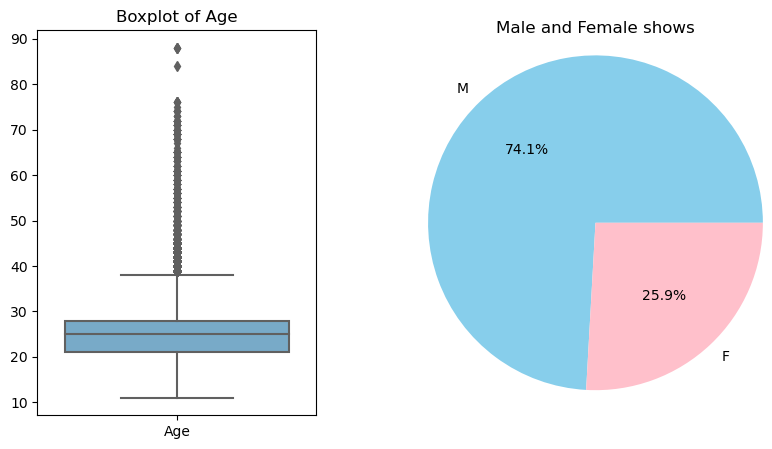

In [242]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sns.boxplot(data=olympic_df[['Age']], ax=ax[0],palette='Blues')
ax[0].set_title('Boxplot of Age')
sns.set_palette("pastel")
sex_counts = olympic_df['Sex'].value_counts()
ax[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'pink'], radius=1.5)
ax[1].set_title('Male and Female shows', y=1.15)
plt.subplots_adjust(wspace=0.5)
plt.show()

רצינו לראות את ההתפלגות הגילאים והמינים של השחקנים שהשתתפו באולימפיאדה

In [243]:
summer_olympics_df = olympic_df[olympic_df['Season'] == 'Summer']
winter_olympics_df = olympic_df[olympic_df['Season'] == 'Winter']

In [244]:
summer_top_med_df = summer_olympics_df.groupby('NOC')[['Medal']].count() 
summer_top_med_df= summer_top_med_df.reset_index()
summer_top_med_df = summer_top_med_df.nlargest(10, 'Medal')
winter_top_med_df = winter_olympics_df.groupby('NOC')[['Medal']].count() 
winter_top_med_df= winter_top_med_df.reset_index()
winter_top_med_df = winter_top_med_df.nlargest(10, 'Medal')

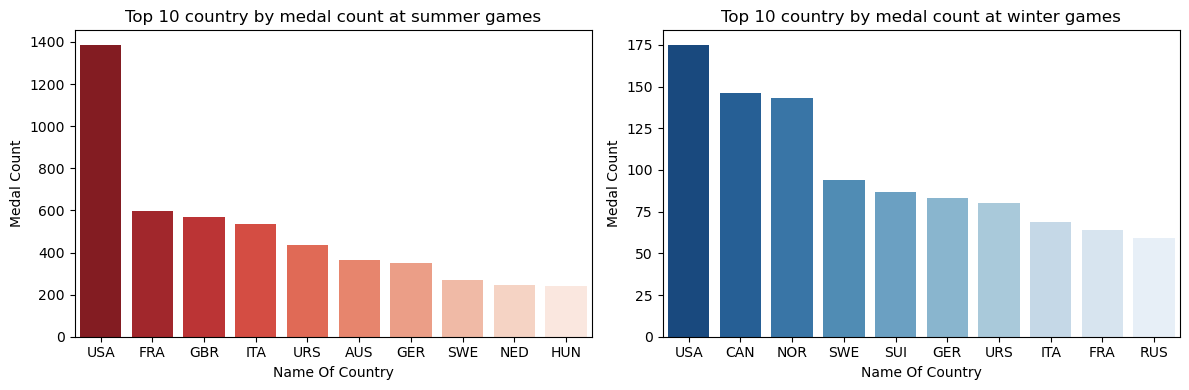

In [245]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=summer_top_med_df, x='NOC', y='Medal', ax=ax[0], palette='Reds_r')
ax[0].set_title('Top 10 country by medal count at summer games')
ax[0].set_xlabel('Name Of Country')
ax[0].set_ylabel('Medal Count')
sns.barplot(data=winter_top_med_df, x='NOC', y='Medal', ax=ax[1], palette='Blues_r')
ax[1].set_title('Top 10 country by medal count at winter games')
ax[1].set_xlabel('Name Of Country')
ax[1].set_ylabel('Medal Count')

plt.tight_layout()
plt.show()

In [246]:
med_df = olympic_df.groupby('reg')[['Medal']].count() 
med_df= med_df.reset_index()
med_df = med_df.nlargest(10, 'Medal')

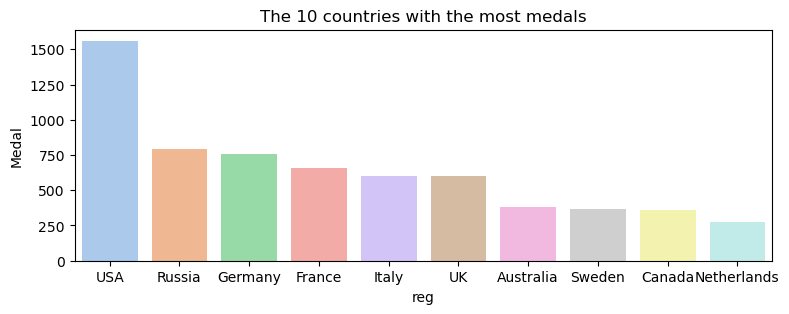

In [249]:
plt.figure(figsize=(9, 3))
sns.barplot(x='reg', y='Medal', data=med_df)
plt.title('The 10 countries with the most medals')
plt.xlabel('reg')
plt.ylabel('Medal')
plt.show()

In [250]:
events_summer_df = summer_olympics_df.groupby('Games')[['Sport']].nunique()
events_summer_df = events_summer_df.reset_index()
events_winter_df = winter_olympics_df.groupby('Games')[['Sport']].nunique()
events_winter_df = events_winter_df.reset_index()

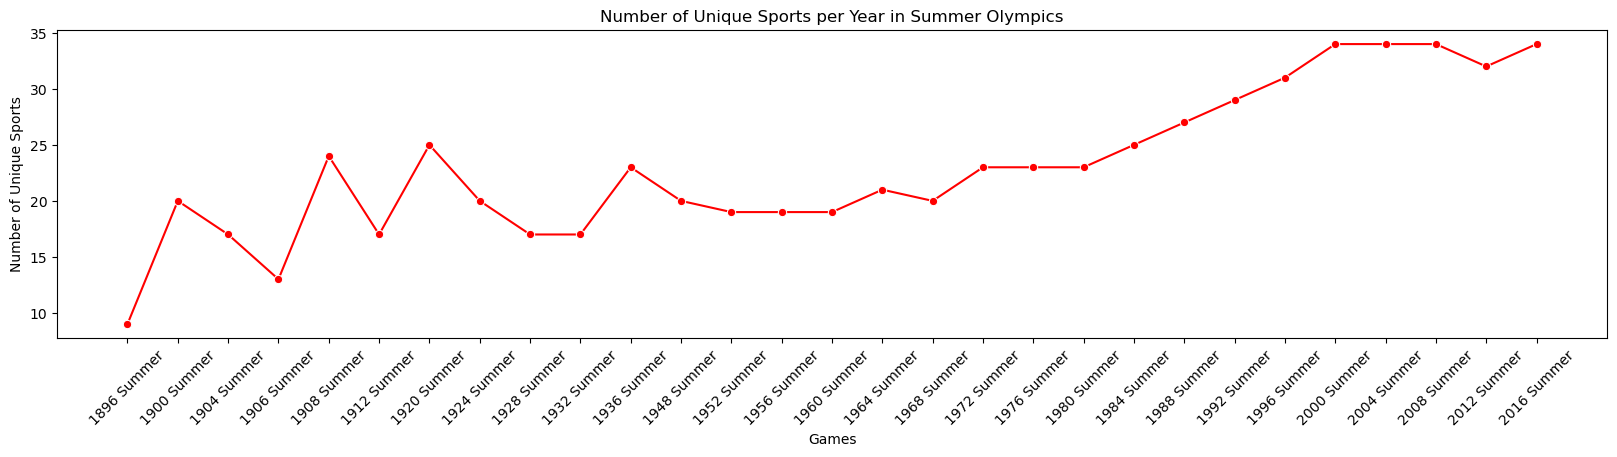

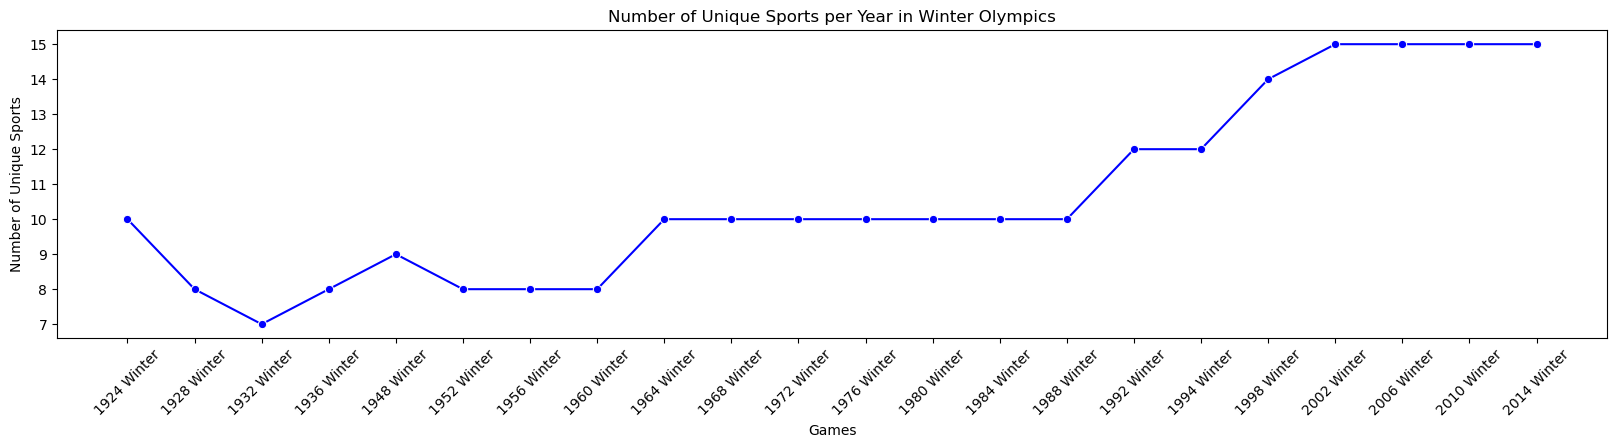

In [251]:
plt.figure(figsize=(20, 4))
sns.lineplot(data=events_summer_df, x='Games', y='Sport', marker='o', color='red')
plt.title('Number of Unique Sports per Year in Summer Olympics')
plt.xlabel('Games')
plt.ylabel('Number of Unique Sports')
plt.xticks(rotation=45)
# sns.despine()
plt.show()
plt.figure(figsize=(20, 4))
sns.lineplot(data=events_winter_df, x='Games', y='Sport', marker='o', color='blue')
plt.title('Number of Unique Sports per Year in Winter Olympics')
plt.xlabel('Games')
plt.ylabel('Number of Unique Sports')
plt.xticks(rotation=45)
# sns.despine()
plt.show()

In [252]:
top_ath_df = olympic_df.groupby('Name')[['Medal']].count() 
top_ath_df= top_ath_df.reset_index()
top_ath_df = top_ath_df.nlargest(10, 'Medal')
top_ath_df = top_ath_df.merge(olympic_df[['Name','NOC']], on='Name', how='left').drop_duplicates()
top_ath_df

,Name,Medal,NOC
0,Nikolay Yefimovich Andrianov,15,URS
24,Ole Einar Bjrndalen,13,NOR
51,Birgit Fischer-Schmidt,12,GDR
55,Birgit Fischer-Schmidt,12,GER
64,Natalie Anne Coughlin (-Hall),12,USA
76,"Matthew Nicholas ""Matt"" Biondi",11,USA
88,Viktor Ivanovych Chukarin,11,URS
104,Vra slavsk (-Odloilov),11,TCH
122,Aleksandr Nikolayevich Dityatin,10,URS
138,Marit Bjrgen,10,NOR


In [212]:
change_ath_df = olympic_df.groupby('Name')[['NOC']].nunique() 
change_ath_df= change_ath_df.reset_index()
change_ath_df = change_ath_df.nlargest(61, 'NOC')
change_ath_df = change_ath_df.rename(columns={'NOC': 'Number of shows'})
change_ath_df = change_ath_df.merge(olympic_df[['Name','NOC','reg','Year','Season']], on='Name', how='left').drop_duplicates()
change_ath_df

,Name,Number of shows,NOC,reg,Year,Season
0,Mamadou Diallo,4,MTN,Mauritania,1984,Summer
1,Mamadou Diallo,4,GUI,Guinea,1980,Summer
2,Mamadou Diallo,4,MLI,Mali,2004,Summer
3,Mamadou Diallo,4,SEN,Senegal,1984,Summer
4,Andrey Pavlovich Bakhvalov,3,URS,Russia,1988,Winter
...,...,...,...,...,...,...
285,"Annemarie Josefina ""Anna"" Cox-Wood",2,AUS,Australia,1992,Summer
287,"Annemarie Josefina ""Anna"" Cox-Wood",2,AUS,Australia,1996,Summer
288,"Annemarie Josefina ""Anna"" Cox-Wood",2,AUS,Australia,2000,Summer
289,"Apolinario ""Polin"" Belisle Gmez",2,BIZ,Belize,1988,Summer


In [302]:
israel_df = olympic_df[olympic_df['reg'] == 'Israel']
israel_df.shape

(157, 16)

In [309]:
israel_df 
medal = israel_df.groupby('Sport')[['Medal']].count()
medal = medal.reset_index()
medal

,Sport,Medal
0,Athletics,0
1,Basketball,0
2,Boxing,0
3,Canoeing,0
4,Cycling,0
5,Fencing,0
6,Figure Skating,0
7,Football,0
8,Golf,0
9,Gymnastics,0


In [257]:
col_to_dummy = ['Sport']
col_num = ['Age','Height','Weight']
dummy_olympic =  pd.get_dummies(summer_olympics_df[col_to_dummy])

dummy_olympic.columns

Index(['Sport_Alpinism', 'Sport_Archery', 'Sport_Art Competitions',
       'Sport_Athletics', 'Sport_Badminton', 'Sport_Baseball',
       'Sport_Basketball', 'Sport_Basque Pelota', 'Sport_Beach Volleyball',
       'Sport_Boxing', 'Sport_Canoeing', 'Sport_Cricket', 'Sport_Croquet',
       'Sport_Cycling', 'Sport_Diving', 'Sport_Equestrianism', 'Sport_Fencing',
       'Sport_Figure Skating', 'Sport_Football', 'Sport_Golf',
       'Sport_Gymnastics', 'Sport_Handball', 'Sport_Hockey',
       'Sport_Ice Hockey', 'Sport_Jeu De Paume', 'Sport_Judo',
       'Sport_Lacrosse', 'Sport_Modern Pentathlon', 'Sport_Motorboating',
       'Sport_Polo', 'Sport_Racquets', 'Sport_Rhythmic Gymnastics',
       'Sport_Roque', 'Sport_Rowing', 'Sport_Rugby', 'Sport_Rugby Sevens',
       'Sport_Sailing', 'Sport_Shooting', 'Sport_Softball', 'Sport_Swimming',
       'Sport_Synchronized Swimming', 'Sport_Table Tennis', 'Sport_Taekwondo',
       'Sport_Tennis', 'Sport_Trampolining', 'Sport_Triathlon',
       'Sport

In [281]:
# # הפיכת עמודת הספורט למשתנה דמי
# sport_dummy = pd.get_dummies(summer_olympics_df['Sport'])
# sport_dummy = ['Age', 'Height', 'Weight'] + list(sport_dummy.columns)
# # יצירת DataFrame עם עמודות המתאימות
# cols = ['Age', 'Height', 'Weight'] + list(sport_dummy.columns)
# data_for_corr = sport_dummy[cols]

# # חישוב טבלת קורלציה
# correlation_table = data_for_corr.corr()

# # הצגת הטבלה
# correlation_table
# הפיכת עמודת הספורט למשתנה דמי
# הפיכת עמודת הספורט למשתנה דמי
sport_dummy = pd.get_dummies(summer_olympics_df['Sport'])
sport_dummy_cols = list(sport_dummy.columns)

# יצירת DataFrame עם עמודות המתאימות
cols = ['Age', 'Height', 'Weight'] + sport_dummy_cols
data_for_corr = summer_olympics_df[cols]

correlation_matrix = sport_dummy.corr(numeric_only = False, method = 'spearman' ).round(2)
subset_correlation_matrix = correlation_matrix[cols].transpose()
subset_correlation_matrix


KeyError: "['Alpinism', 'Archery', 'Art Competitions', 'Athletics', 'Badminton', 'Baseball', 'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Boxing', 'Canoeing', 'Cricket', 'Croquet', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football', 'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Modern Pentathlon', 'Motorboating', 'Polo', 'Racquets', 'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting', 'Softball', 'Swimming', 'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling'] not in index"

In [277]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = summer_olympics_df
data = le.fit_transform(data['Sport'])

# חישוב הקורלציה
correlation = data[['height', 'sport_encoded']].corr()

print(correlation)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [258]:
len(olympic_df['NOC'].unique())

226

In [195]:
olympic_df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [14]:
olympic_df.shape

(70000, 15)

In [15]:
year_df = olympic_df.groupby('Year')
year_df

In [16]:
tr = olympic_df[olympic_df['Year'] == 1896]
tr

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3079,1724,Aristidis Akratopoulos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,NaN
3080,1724,Aristidis Akratopoulos,M,NaN,NaN,NaN,Greece-3,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,NaN
3081,1725,"Konstantinos ""Kostas"" Akratopoulos",M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,NaN
3082,1725,"Konstantinos ""Kostas"" Akratopoulos",M,NaN,NaN,NaN,Greece-3,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,NaN
7348,4113,Anastasios Andreou,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 110 metres Hurdles,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63072,32330,Launceston Elliot,M,21.0,188.0,102.0,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rope Climbing,NaN
68788,35093,Alexios Fetsis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",NaN
68789,35093,Alexios Fetsis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 200 metres",NaN
68790,35094,Angelos Fetsis,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,NaN


In [17]:
tr = olympic_df[olympic_df['Medal'] == 'Bronze']
len(tr)

3208